In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from joblib import dump,load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [20]:
def read_csv(name,sep=","):
    data = pd.read_csv(name,sep=sep)
    return data

def read_from_file(typ_,name,sep=None):
    if typ_ == "csv":
        data = read_csv(name,sep)
    else:
        data = None
    return data

def read_from_data(typ_,data):
    return None

def read_from_file_or_data(typ_,sect=None,name=None,data=None,sep=None):
    if sect == "file":
        data = read_from_file(typ_,name,sep)
    else:
        data = read_from_data(typ_,data)
    return data

In [21]:
df= read_from_file_or_data(typ_="csv",sect="file",name="/content/Accidents0514.csv",sep=",")

In [22]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0.0,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863


In [23]:
df.dtypes

,0
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,int64
Number_of_Casualties,int64
Date,object


In [54]:
def write_dataframe_csv(dataframe,name):
    dataframe.to_csv(name)

def write_data(typ_,data,name):
    if typ_ == "csv":
        write_dataframe_csv(data,name)
    else:
        pass

In [25]:
write_data(typ_="csv",data=df,name="speed_accident")

In [26]:
def load_one(data):
    return data

def load_two(data1,data2,axis=0,drop_index=True):
    combined = pd.concat([data1,data2],axis=axis)
    combined = combined.sample(frac=1,random_state=2).reset_index(drop=drop_index)
    return combined

def loader(typ_,data,axis=0,drop_index=True):
    if typ_ == "one":
        data = load_one(data)
    elif typ_ == "two":
        data = load_two(data[0],data[1],axis=0,drop_index=True)
    else:
        data = None
    return data



In [27]:
def data_spliter(train,label,random_state=2,test_size=0.3):
    train_x,test_x,train_y,test_y = train_test_split(train,label,random_state=random_state,test_size=test_size)
    return train_x,test_x,train_y,test_y

def set_ss(data):
    ss = StandardScaler()
    scaled = ss.fit_transform(data)
    return scaled

def scalers(typ_,data):
    scaled = None
    if typ_ == "ss":
        scaled = set_ss(data)
    else:
        pass
    return scaled


def select_train_columns(data,n):
    train = data.iloc[:,:n]
    return train,train.columns

def select_label_column(data,column_name):
    labels = np.array(data[column_name])
    return labels

In [28]:
def dcl_train(train,label,model_name):
    dcl = DecisionTreeClassifier()
    dcl.fit(train,label)
    dump(dcl,model_name)
    return dcl

def train(typ_,train,label,model_name):
    if typ_ == "dcl":
        return dcl_train(train,label,model_name)
    else:
        return None


In [29]:
def predict(model_name,data):
    model = load(model_name)
    label = model.predict(data)
    return label

In [30]:
def retrain_with_new_data(model_name,train,label):
    model = load(model_name)
    model.fit(train,label)
    dump(model,model_name)
    return model


def retrain_with_new_and_old_data(model_name,train,label):
    c_train = np.vstack([train[0], train[1]])
    clabel = np.concatenate([label[0], label[1]])
    model = load(model_name)
    model.fit(c_train,clabel)
    dump(model,model_name)
    return model

def retrain(typ_,model_name,train,label):
    if typ_ == "only_new":
        model = retrain_with_new_data(model_name,train,label)
    elif typ_ == "new_and_old":
        model = retrain_with_new_and_old_data(model_name,train,label)
    else:
        pass
    return model

In [63]:
def get_metrics(true_labels, predicted_labels):
    metrics = {}

    metrics['Accuracy:'] = np.round(accuracy_score(true_labels,predicted_labels),4)
    metrics['Precision:'] =  np.round(precision_score(true_labels,predicted_labels,average='weighted'),4)
    metrics['Recall:'] = np.round(recall_score(true_labels,predicted_labels,average='weighted'),4)
    metrics['F1 Score:'] = np.round(f1_score(true_labels,predicted_labels,average='weighted'),4)
    return metrics

def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report =classification_report(y_true=true_labels,
                                           y_pred=predicted_labels,
                                           labels=classes)
    return report



def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    stats = {}
    metrics = get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    report = display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels,classes=classes)
    stats["metrics"] = metrics
    stats["report"] = report
    return stats

def model_analysis(true_labels,predicted_labels,classes,typ_="default"):
    if typ_ == "default":
        metrics = display_model_performance_metrics(true_labels, predicted_labels,classes)
    else:
        pass
    return metrics


In [32]:
def label_encoder(data):
    l = LabelEncoder()
    data = l.fit_transform(data)
    return data

In [33]:
def covert_objects_to_int(data):
    columns = data.columns
    for i in columns:
        if data[i].dtype == object:
            data[i] = label_encoder(data[i])
    return data



In [40]:
#model

def model(loader_type,data,data_type,scaler_type,model_type,model_name,analysis_type,train_column_limit,classes,label,test_ratio=0.3):
    data = loader(loader_type,data,axis=0,drop_index=True)

    #convert objects to int
    rta_ = covert_objects_to_int(data)

    #column and label selection
    rta_t,columns = select_train_columns(data,train_column_limit)
    rta_label = select_label_column(data,label)

    #spilting
    rta_t_train_x1,rta_t_test_x1,rta_label_train_y1,rta_label_test_y1 = data_spliter(rta_t,rta_label,random_state=2,test_size=test_ratio)

    #saving training and testing data
    write_data(data_type,rta_t_train_x1,"training_data")
    write_data(data_type,rta_t_test_x1,"testing_data")

    #scaling
    ss1_fit = scalers(scaler_type,rta_t_train_x1)
    ss1_test = scalers(scaler_type,rta_t_test_x1)


    #training of the model
    model = train(model_type,rta_t_train_x1,rta_label_train_y1,model_name)

    #predicting
    preds = predict(model_name,ss1_test)

    #evaluation
    metrics = model_analysis(rta_label_test_y1,preds,classes,typ_=analysis_type)
    return metrics


In [35]:
df1=df.drop(["Accident_Severity"], axis=1)

In [36]:
df1["Accident_Severity"]=df["Accident_Severity"]

In [37]:
len(df1.columns)

32

In [38]:
df["Accident_Severity"].unique()

array([2, 3, 1])

In [43]:
metrics=model(loader_type="one",data=df,data_type="csv",scaler_type="ss",model_type="dcl",model_name="speed_accident",analysis_type="default",train_column_limit=-1,classes=[2, 3, 1],label="Accident_Severity",test_ratio=0.3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

In [44]:
metrics

{'metrics': {'Accuracy:': 0.0136,
  'Precision:': 0.0002,
  'Recall:': 0.0136,
  'F1 Score:': 0.0004},
 'report': '              precision    recall  f1-score   support\n\n           2       0.00      0.00      0.00     46484\n           3       0.00      0.00      0.00    299210\n           1       0.01      1.00      0.03      4784\n\n    accuracy                           0.01    350478\n   macro avg       0.00      0.33      0.01    350478\nweighted avg       0.00      0.01      0.00    350478\n'}

In [55]:
#prediction
def prediction(data,model_name,scaler_type):
    data = pd.DataFrame(data)
    data = covert_objects_to_int(data)
    data = scalers(scaler_type,data)
    preds = predict(model_name,data)
    return preds

In [47]:
p=df1.iloc[:3][:-2]

In [48]:
len(p.columns )

32

In [49]:
p.reset_index(drop=True,inplace=True)

In [50]:
df1

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Accident_Severity
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,1,1,04/01/2005,3,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,2
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,1,1,05/01/2005,4,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,3
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,2,1,06/01/2005,5,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,3
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,1,1,07/01/2005,6,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,3
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,1,1,10/01/2005,2,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168254,2011440523367,486100.0,150980.0,-0.767684,51.251441,44,3,1,13/12/2011,3,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01023143,2
1168255,2011440523383,456280.0,105410.0,-1.201987,50.845418,44,1,1,13/12/2011,3,...,0.0,4.0,2.0,2.0,0.0,0.0,1.0,1.0,E01022739,3
1168256,2011440523448,460020.0,101590.0,-1.149494,50.810695,44,2,1,13/12/2011,3,...,0.0,6.0,1.0,2.0,0.0,0.0,1.0,1.0,E01022815,3
1168257,2011440523450,458310.0,101880.0,-1.173717,50.813477,44,2,1,13/12/2011,3,...,0.0,4.0,5.0,2.0,0.0,0.0,1.0,1.0,E01022834,2


In [51]:
p=p.drop(["Accident_Severity"], axis=1)

In [56]:
pp=prediction(data=p,model_name="speed_accident",scaler_type="ss")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [57]:
p

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.19117,51.489096,1,1,1,04/01/2005,3,...,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849


In [66]:
#retraining
def retrained(train,label,test,test_label,classes,typ_,model_name,analysis_type):
    model = retrain(typ_=typ_,model_name=model_name,train=train,label=label)
    preds = model.predict(test)
    #evaluation
    metrics = model_analysis(true_labels=test_label,predicted_labels=preds,classes=classes,typ_=analysis_type)
    return metrics

def process(loader_type,train,label,train_column_limit,data_type,scaler_type,test_ratio=0.3):
    train = loader(loader_type,train,axis=0,drop_index=True)

    #convert objects to int
    train = covert_objects_to_int(train)

    #column and label selection
    train_,columns = select_train_columns(train,train_column_limit)
    label = select_label_column(train,label)

    #spilting
    train_x,test_x,label_x,test_y = data_spliter(train_,label,random_state=2,test_size=test_ratio)

    #saving training and testing data
    write_data(data_type,train_x,"training_data")
    write_data(data_type,test_x,"testing_data")

    #scaling
    scaled_train_x = scalers(scaler_type,train_x)
    scaled_test_x = scalers(scaler_type,test_x)
    return scaled_train_x,scaled_test_x,label_x,test_y

In [59]:
df1

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Accident_Severity
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,1,1,04/01/2005,3,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,2
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,1,1,05/01/2005,4,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,3
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,2,1,06/01/2005,5,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,3
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,1,1,07/01/2005,6,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,3
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,1,1,10/01/2005,2,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168254,2011440523367,486100.0,150980.0,-0.767684,51.251441,44,3,1,13/12/2011,3,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01023143,2
1168255,2011440523383,456280.0,105410.0,-1.201987,50.845418,44,1,1,13/12/2011,3,...,0.0,4.0,2.0,2.0,0.0,0.0,1.0,1.0,E01022739,3
1168256,2011440523448,460020.0,101590.0,-1.149494,50.810695,44,2,1,13/12/2011,3,...,0.0,6.0,1.0,2.0,0.0,0.0,1.0,1.0,E01022815,3
1168257,2011440523450,458310.0,101880.0,-1.173717,50.813477,44,2,1,13/12/2011,3,...,0.0,4.0,5.0,2.0,0.0,0.0,1.0,1.0,E01022834,2


In [67]:
m,l,o,p=process(loader_type="one",train=df1,label="Accident_Severity",train_column_limit=-2,scaler_type="ss",data_type="csv",test_ratio=0.3)

In [69]:
me=retrained(train=m,label=o,test=l,test_label=p,classes=[2 ,1 , 3],typ_="only_new",model_name="speed_accident",analysis_type="default")

In [70]:
me

{'metrics': {'Accuracy:': 0.7493,
  'Precision:': 0.7626,
  'Recall:': 0.7493,
  'F1 Score:': 0.7558},
 'report': '              precision    recall  f1-score   support\n\n           2       0.18      0.20      0.19     46484\n           1       0.04      0.05      0.05      4784\n           3       0.87      0.85      0.86    299210\n\n    accuracy                           0.75    350478\n   macro avg       0.36      0.36      0.36    350478\nweighted avg       0.76      0.75      0.76    350478\n'}

In [72]:
data = "/content/Accidents0514.csv"
rta = read_from_file_or_data(sect="file",typ_="csv",name=data,sep=",")
rta_ = rta
rta_ = covert_objects_to_int(rta_)
rta_.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,252,...,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,2835
1,1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,336,...,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2895
2,2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,420,...,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2843
3,3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,504,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2826
4,4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,756,...,0.0,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,2849


<ipython-input-74-9143000f1a17>:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=(0.0,0.0,1.2,1.2))


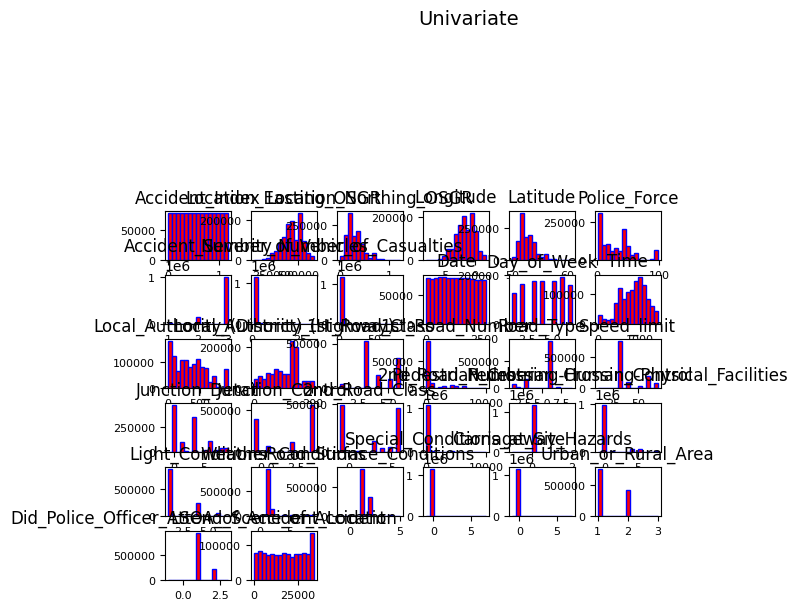

In [74]:
#Univariate Analysis
rta_.hist(bins=15,edgecolor="blue",color="red",linewidth=1.0,xlabelsize=8,ylabelsize=8,grid=False)
plt.tight_layout(rect=(0.0,0.0,1.2,1.2))
plt.suptitle("Univariate",x=0.6,y=1.3,fontsize=14)
plt.show()

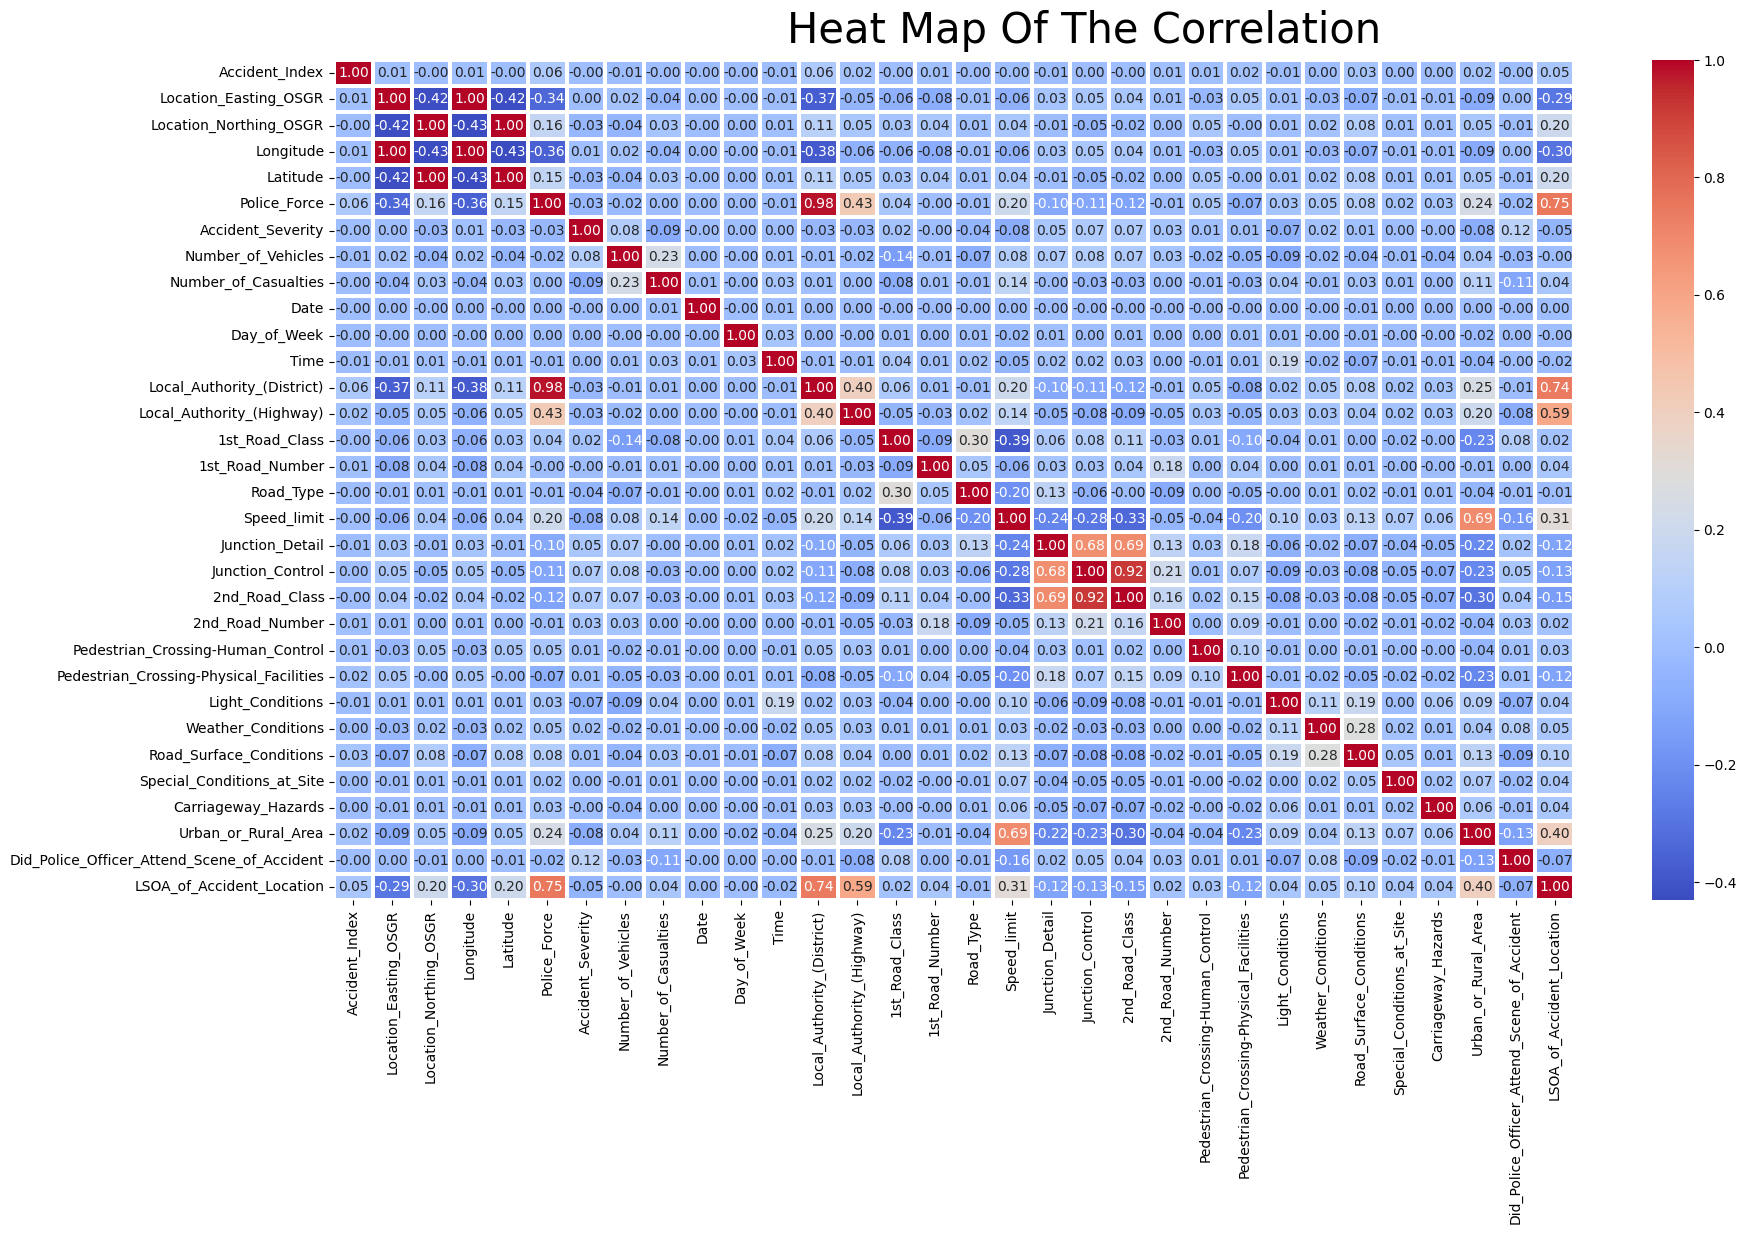

In [75]:
#MulitVariate Analyis
fig,ax = plt.subplots(figsize=(20,10))
rta_corr = rta_.corr()
heatmap = sns.heatmap(round(rta_corr,2),ax=ax,annot=True,cmap="coolwarm",fmt=".2f",linewidths=1.5)
fig.subplots_adjust(top=0.95)
t = fig.suptitle("Heat Map Of The Correlation",y=1,fontsize=30)